# Configuração do Colab

In [ ]:
!pip install mysql-connector-python

!pip install pandas sqlalchemy pymysql

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

import mysql.connector
from mysql.connector import Error



In [ ]:
!curl ipecho.net/plain

34.80.84.189

# DB LOCADORA

In [ ]:

# Definir as credenciais e informações da conexão
servidor = '34.27.71.185'
basededados = 'locadora'
usuario = 'jlsgo'
senha = 'SoulCode091009*'

# Define the conectar_mysql function
# This function establishes a connection to the MySQL database
def conectar_mysql(servidor, basededados, usuario, senha):
    try:
        conexao = mysql.connector.connect(
            host=servidor,
            database=basededados,
            user=usuario,
            password=senha
        )
        print("Conexão com o MySQL bem-sucedida!")
        return conexao
    except Error as err:
        print(f"Erro durante a conexão com o MySQL: {err}")
        return None

# Estabelecer a conexão
conexao = conectar_mysql(servidor, basededados, usuario, senha)

# Create a SQLAlchemy engine using the connection parameters
engine = create_engine(f'mysql+mysqlconnector://{usuario}:{senha}@{servidor}/{basededados}')

# consulta SQL
query = '''
SELECT
  a.codaluguel,
  a.codcliente,
  a.codcarro,
  a.data_aluguel,
  cli.nome,
  cli.cidade,
  cli.sexo,
  cli.estado,
  cli.estadocivil,
  m.codmarca,
  m.marca,
  car.modelo,
  car.valor
FROM
  aluguel a
LEFT JOIN
  cliente cli ON a.codcliente = cli.codcliente
LEFT JOIN
  carro car ON a.codcarro = car.codcarro
LEFT JOIN
  marca m ON car.codmarca = m.codmarca
ORDER BY
  a.codaluguel ASC;
'''
# Executar a consulta SQL e carregar os dados no DataFrame
df_locadora = pd.read_sql(query, engine)


# Visualizar o DataFrame final
display(df_locadora)

# Exportando o DataFrame ordenado para um arquivo CSV
df_locadora.to_csv('df_locadora.csv', index=False)

Conexão com o MySQL bem-sucedida!


,codaluguel,codcliente,codcarro,data_aluguel,nome,cidade,sexo,estado,estadocivil,codmarca,marca,modelo,valor
0,1,3,2,2023-04-01,Túlio Nascimento,Duque de Caxias,M,RJ,S,2,Fiat,Argo,150.0
1,2,2,1,2023-04-02,Bruna Pereira,Niterói,F,RJ,C,1,Ford,Ka,100.0
2,3,2,1,2023-04-03,Bruna Pereira,Niterói,F,RJ,C,1,Ford,Ka,100.0
3,4,2,3,2023-04-04,Bruna Pereira,Niterói,F,RJ,C,3,Chevrolet,Onix,170.0
4,5,1,4,2023-04-05,Ana Silva,Duque de Caxias,F,RJ,C,4,Volkswagen,Polo,150.0
5,6,1,4,2023-04-13,Ana Silva,Duque de Caxias,F,RJ,C,4,Volkswagen,Polo,150.0
6,7,1,1,2023-04-15,Ana Silva,Duque de Caxias,F,RJ,C,1,Ford,Ka,100.0
7,8,5,2,2023-04-19,Lúcia Andrade,São Paulo,F,SP,C,2,Fiat,Argo,150.0
8,9,5,2,2023-04-21,Lúcia Andrade,São Paulo,F,SP,C,2,Fiat,Argo,150.0
9,10,3,1,2023-04-25,Túlio Nascimento,Duque de Caxias,M,RJ,S,1,Ford,Ka,100.0


# DB LOGISTICA

In [ ]:

# Definir as credenciais e informações da conexão
servidor = '34.27.71.185'
basededados = 'logistica'
usuario = 'jlsgo'
senha = 'SoulCode091009*'

# Função para conectar ao banco de dados
def conectar_mysql(servidor, basededados, usuario, senha):
    try:
        conn = mysql.connector.connect(
            host=servidor,
            database=basededados,
            user=usuario,
            password=senha
        )
        if conn.is_connected():
            print("Conexão bem-sucedida ao banco de dados MySQL")
            return conn
    except Error as e:
        print(f"Erro ao conectar ao MySQL: {e}")
        return None

# Estabelecer a conexão
conexao = conectar_mysql(servidor, basededados, usuario, senha)

engine = create_engine(f'mysql+mysqlconnector://{usuario}:{senha}@{servidor}/{basededados}')


# consulta SQL
query = '''
SELECT
  p.ID_Pedido,
  p.Data_Pedido,
  p.Data_Entrega_Estimada,
  p.Data_Entrega_Real,
  p.Distancia_km,
  p.Custo_Transporte,
  p.Peso_kg,
  p.Regiao,
  m.Nome AS Nome_Motorista,
  m.Idade AS Idade_Motorista,
  m.Tempo_de_Empresa AS Tempo_de_Empresa_Motorista,
  m.Avaliacao_Desempenho AS Avaliacao_Desempenho_Motorista,
  v.Tipo AS Tipo_Veiculo,
  v.Capacidade_kg AS Capacidade_kg_Veiculo,
  v.Custo_Manutencao_Mensal AS Custo_Manutencao_Mensal_Veiculo,
  v.Consumo_Combustivel_km_l AS Consumo_Combustivel_km_l_Veiculo
FROM
  Pedidos p
LEFT JOIN
  Motoristas m ON p.Motorista = m.ID_Motorista
LEFT JOIN
  Veiculos v ON p.Veiculo = v.ID_Veiculo
ORDER BY
  p.ID_Pedido ASC;
'''

# Executar a consulta SQL e carregar os dados no DataFrame
df_logistica = pd.read_sql(query, engine)

# Visualizar o DataFrame final
display(df_logistica)

# Exportando o DataFrame ordenado para um arquivo CSV
df_logistica.to_csv('df_logistica.csv', index=False)

Conexão bem-sucedida ao banco de dados MySQL


,ID_Pedido,Data_Pedido,Data_Entrega_Estimada,Data_Entrega_Real,Distancia_km,Custo_Transporte,Peso_kg,Regiao,Nome_Motorista,Idade_Motorista,Tempo_de_Empresa_Motorista,Avaliacao_Desempenho_Motorista,Tipo_Veiculo,Capacidade_kg_Veiculo,Custo_Manutencao_Mensal_Veiculo,Consumo_Combustivel_km_l_Veiculo
0,1,2023-01-01,2023-01-05,2023-01-06,380.7950,128.286,322.8060,West Jon,Daniel Hunt,55,8,4.67671,Moto,220.467,2200.330,5.33277
1,2,2023-01-02,2023-01-06,2023-01-07,951.2070,672.769,46.6493,Laurenside,Jamie Rivera,34,9,2.92148,Van,133.140,3906.870,9.03009
2,3,2023-01-03,2023-01-07,2023-01-08,734.6740,382.920,85.0062,Brookefurt,Craig Peterson,27,28,4.50665,Moto,774.620,2904.560,9.12098
3,4,2023-01-04,2023-01-08,2023-01-09,602.6720,557.714,449.7840,Justinshire,James Larson,45,6,1.12926,Caminhão,986.757,839.116,8.07568
4,5,2023-01-05,2023-01-09,2023-01-10,164.4580,916.810,305.1820,North Sarah,David Gill,43,8,1.53274,Moto,774.620,2904.560,9.12098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2023-04-06,2023-04-10,2023-04-11,498.8580,414.289,263.5100,Turnerville,Tim Martin,38,4,2.66656,Moto,220.467,2200.330,5.33277
96,97,2023-04-07,2023-04-11,2023-04-12,527.5050,753.360,386.1470,Port Linda,Terri Hatfield,40,12,2.11905,Caminhão,986.757,839.116,8.07568
97,98,2023-04-08,2023-04-12,2023-04-13,433.2660,907.399,111.8310,East Jesse,Terri Hatfield,40,12,2.11905,Moto,220.467,2200.330,5.33277
98,99,2023-04-09,2023-04-13,2023-04-14,35.1649,898.378,313.3310,Leburgh,Joshua Ortiz,42,28,4.76213,Van,133.140,3906.870,9.03009


# DB LOJA


In [ ]:
# Definir as credenciais e informações da conexão
servidor = '34.27.71.185'
basededados = 'loja'
usuario = 'jlsgo'
senha = 'SoulCode091009*'

# Função para conectar ao banco de dados
def conectar_mysql(servidor, basededados, usuario, senha):
    try:
        conn = mysql.connector.connect(
            host=servidor,
            database=basededados,
            user=usuario,
            password=senha
        )
        if conn.is_connected():
            print("Conexão bem-sucedida ao banco de dados MySQL")
            return conn
    except Error as e:
        print(f"Erro ao conectar ao MySQL: {e}")
        return None

# Estabelecer a conexão
conexao = conectar_mysql(servidor, basededados, usuario, senha)

engine = create_engine(f'mysql+mysqlconnector://{usuario}:{senha}@{servidor}/{basededados}')

# consulta SQL
query = '''
SELECT
  v.id_venda,
  v.id_produto,
  v.id_cliente,
  v.id_funcionario,
  v.data,
  v.quantidade,
  p.nome AS nome_produto,
  p.preco AS preco_produto,
  c.nome AS nome_categoria,
  f.nome AS nome_fornecedor,
  cli.nome AS nome_cliente,
  cli.telefone AS telefone_cliente,
  cli.cidade AS cidade_cliente,
  cli.email AS email_cliente,
  cli.genero AS genero_cliente,
  cli.endereco AS endereco_cliente,
  cli.renda AS renda_cliente,
  cli.data_nascimento AS data_nascimento_cliente,
  func.nome AS nome_funcionario,
  func.data_nascimento AS data_nascimento_funcionario,
  func.genero AS genero_funcionario,
  func.estado_civil AS estado_civil_funcionario,
  func.dependentes AS dependentes_funcionario,
  func.cargo AS cargo_funcionario,
  func.salario AS salario_funcionario
FROM
  vendas v
LEFT JOIN
  produtos p ON v.id_produto = p.id_produto
LEFT JOIN
  categorias c ON p.id_categoria = c.id_categoria
LEFT JOIN
  fornecedores f ON p.id_fornecedor = f.id_fornecedor
LEFT JOIN
  clientes cli ON v.id_cliente = cli.id_cliente
LEFT JOIN
  funcionarios func ON v.id_funcionario = func.id_funcionario
ORDER BY
  v.id_venda ASC;
'''

# Executar a consulta SQL e carregar os dados no DataFrame
df_loja = pd.read_sql(query, engine)

# Visualizar o DataFrame final
display(df_loja)

# Exportando o DataFrame ordenado para um arquivo CSV
df_loja.to_csv('df_loja.csv', index=False)



Conexão bem-sucedida ao banco de dados MySQL


,id_venda,id_produto,id_cliente,id_funcionario,data,quantidade,nome_produto,preco_produto,nome_categoria,nome_fornecedor,...,endereco_cliente,renda_cliente,data_nascimento_cliente,nome_funcionario,data_nascimento_funcionario,genero_funcionario,estado_civil_funcionario,dependentes_funcionario,cargo_funcionario,salario_funcionario
0,1,1,1,1,2024-07-01,2,Smartphone X,1500.0,Eletrônicos,Fornecedor A,...,"Rua A, 123",5000.0,1980-05-10,Fernando Silva,1982-07-15,Masculino,Casado,2,Vendedor,3500.0
1,2,3,2,2,2024-07-02,1,Camiseta Z,50.0,Roupas,Fornecedor C,...,"Av. B, 456",4000.0,1985-08-15,Aline Costa,1980-12-20,Feminino,Solteira,0,Gerente,6000.0
2,3,5,3,1,2024-07-03,1,Sofá Confort,2500.0,Móveis,Fornecedor A,...,"Rua C, 789",4500.0,1982-03-25,Fernando Silva,1982-07-15,Masculino,Casado,2,Vendedor,3500.0
3,4,2,4,3,2024-07-04,1,Notebook Y,3000.0,Eletrônicos,Fornecedor B,...,"Av. D, 987",3800.0,1990-12-08,Marcos Oliveira,1975-03-10,Masculino,Divorciado,1,Caixa,2800.0
4,5,4,5,2,2024-07-05,3,Arroz Integral,10.0,Alimentos,Fornecedor C,...,"Rua E, 654",6000.0,1975-09-14,Aline Costa,1980-12-20,Feminino,Solteira,0,Gerente,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,119,18,39,7,2024-10-27,1,Blusa de Frio,80.0,Roupas,Fornecedor C,...,"Av. M1, 321",7000.0,1985-01-14,Rodrigo Santos,1977-11-30,Masculino,Divorciado,2,Caixa,2800.0
119,120,20,40,8,2024-10-28,2,Sapateira,200.0,Móveis,Fornecedor A,...,"Rua N1, 876",3200.0,1993-04-27,Mariana Ferreira,1985-02-15,Feminino,Casada,1,Gerente,6000.0
120,121,1,1,9,2024-10-29,1,Smartphone X,1500.0,Eletrônicos,Fornecedor A,...,"Rua A, 123",5000.0,1980-05-10,Lucas Costa,1989-08-10,Masculino,Solteiro,0,Vendedor,3400.0
121,122,3,2,10,2024-10-30,2,Camiseta Z,50.0,Roupas,Fornecedor C,...,"Av. B, 456",4000.0,1985-08-15,Ana Oliveira,1984-03-20,Feminino,Casada,2,Caixa,3000.0


# DB Marketing Digital

In [ ]:
# Definir as credenciais e informações da conexão
servidor = '34.27.71.185'
basededados = 'marketing_digital'
usuario = 'jlsgo'
senha = 'SoulCode091009*'

# Função para conectar ao banco de dados
def conectar_mysql(servidor, basededados, usuario, senha):
    try:
        conn = mysql.connector.connect(
            host=servidor,
            database=basededados,
            user=usuario,
            password=senha
        )
        if conn.is_connected():
            print("Conexão bem-sucedida ao banco de dados MySQL")
            return conn
    except Error as e:
        print(f"Erro ao conectar ao MySQL: {e}")
        return None

# Estabelecer a conexão
conexao = conectar_mysql(servidor, basededados, usuario, senha)

engine = create_engine(f'mysql+mysqlconnector://{usuario}:{senha}@{servidor}/{basededados}')

# consulta SQL
query = '''
SELECT
  c.ID_Campanha,
  c.Plataforma,
  c.Data_Inicio,
  c.Data_Fim,
  c.Investimento_Total,
  c.Impressoes,
  c.Cliques,
  c.Conversoes,
  c.Regiao_Alvo,
  c.Segmento_Alvo,
  p.Nome AS Nome_Plataforma,
  p.Custo_por_Clique,
  p.Custo_por_Impressao,
  p.Conversoes_Totais,
  u.Idade,
  u.Genero,
  u.Localizacao,
  u.Interesses,
  u.Historico_de_Compras,
  u.Tempo_de_Engajamento
FROM
  Campanhas c
LEFT JOIN
  Plataformas p ON c.Plataforma = p.ID_Plataforma
LEFT JOIN
  Usuarios u ON c.Segmento_Alvo = u.ID_Usuario
ORDER BY
  c.ID_Campanha ASC;
'''

# Executar a consulta SQL e carregar os dados no DataFrame
df_marketing_digital = pd.read_sql(query, engine)

# Visualizar o DataFrame final
display(df_marketing_digital)

# Exportando o DataFrame ordenado para um arquivo CSV
df_marketing_digital.to_csv('df_marketing_digital.csv', index=False)

Conexão bem-sucedida ao banco de dados MySQL


,ID_Campanha,Plataforma,Data_Inicio,Data_Fim,Investimento_Total,Impressoes,Cliques,Conversoes,Regiao_Alvo,Segmento_Alvo,Nome_Plataforma,Custo_por_Clique,Custo_por_Impressao,Conversoes_Totais,Idade,Genero,Localizacao,Interesses,Historico_de_Compras,Tempo_de_Engajamento
0,1,Google,2023-01-01,2023-01-07,3014.64,33254,1050,485,Tylershire,Saúde,None,None,None,None,None,None,None,None,None,None
1,2,Google,2023-01-02,2023-01-08,8396.12,48362,2436,72,Mayhaven,Educação,None,None,None,None,None,None,None,None,None,None
2,3,Instagram,2023-01-03,2023-01-09,4105.74,21128,5473,710,Lake Christopher,Saúde,None,None,None,None,None,None,None,None,None,None
3,4,Instagram,2023-01-04,2023-01-10,4128.57,60383,2343,369,Port Jenniferborough,Tecnologia,None,None,None,None,None,None,None,None,None,None
4,5,Google,2023-01-05,2023-01-11,1286.24,66545,2745,570,Molinaton,Saúde,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Facebook,2023-04-06,2023-04-12,5768.56,52356,3532,919,East Henrymouth,Educação,None,None,None,None,None,None,None,None,None,None
96,97,LinkedIn,2023-04-07,2023-04-13,7365.07,11789,788,744,Gloriaview,Tecnologia,None,None,None,None,None,None,None,None,None,None
97,98,Google,2023-04-08,2023-04-14,7910.02,98720,4343,832,Port Carla,Saúde,None,None,None,None,None,None,None,None,None,None
98,99,Facebook,2023-04-09,2023-04-15,1785.61,67656,3801,953,Patriciaton,Tecnologia,None,None,None,None,None,None,None,None,None,None


# DB Recursos Humanos

In [ ]:
# Definir as credenciais e informações da conexão
servidor = '34.27.71.185'
basededados = 'recursos_humanos'
usuario = 'jlsgo'
senha = 'SoulCode091009*'

# Função para conectar ao banco de dados
def conectar_mysql(servidor, basededados, usuario, senha):
    try:
        conn = mysql.connector.connect(
            host=servidor,
            database=basededados,
            user=usuario,
            password=senha
        )
        if conn.is_connected():
            print("Conexão bem-sucedida ao banco de dados MySQL")
            return conn
    except Error as e:
        print(f"Erro ao conectar ao MySQL: {e}")
        return None

# Estabelecer a conexão
conexao = conectar_mysql(servidor, basededados, usuario, senha)

engine = create_engine(f'mysql+mysqlconnector://{usuario}:{senha}@{servidor}/{basededados}')


# consulta SQL
query = '''
SELECT
  a.ID_Avaliacao,
  a.ID_Funcionario,
  a.Data_Avaliacao,
  a.Pontuacao,
  a.Comentario,
  f.Nome AS Nome_Funcionario,
  f.Idade,
  f.Departamento,
  f.Cargo,
  f.Salario,
  f.Data_Contratacao,
  d.ID_Desligamento,
  d.Data_Desligamento,
  d.Motivo
FROM
  Avaliacoes a
LEFT JOIN
  Funcionarios f ON a.ID_Funcionario = f.ID_Funcionario
LEFT JOIN
  Desligamentos d ON a.ID_Funcionario = d.ID_Funcionario
ORDER BY
  a.ID_Avaliacao ASC;
'''

# Executar a consulta SQL e carregar os dados no DataFrame
df_recursos_humanos = pd.read_sql(query, engine)

# Visualizar o DataFrame final
display(df_recursos_humanos)

# Exportando o DataFrame ordenado para um arquivo CSV
df_recursos_humanos.to_csv('df_recursos_humanos.csv', index=False)

Conexão bem-sucedida ao banco de dados MySQL


,ID_Avaliacao,ID_Funcionario,Data_Avaliacao,Pontuacao,Comentario,Nome_Funcionario,Idade,Departamento,Cargo,Salario,Data_Contratacao,ID_Desligamento,Data_Desligamento,Motivo
0,1,24,2022-01-31,2.16235,Walk PM address worker experience.,Annette Downs,56,TI,Coordenador,11815.50,2016-12-31,1.0,2023-01-01,Pedido de Demissão
1,1,24,2022-01-31,2.16235,Walk PM address worker experience.,Annette Downs,56,TI,Coordenador,11815.50,2016-12-31,14.0,2023-04-02,Corte de Custos
2,2,30,2022-02-28,4.14788,Six learn executive term during team investmen...,Craig Benton,35,Vendas,Diretor,4306.57,2017-06-30,3.0,2023-01-15,Pedido de Demissão
3,2,30,2022-02-28,4.14788,Six learn executive term during team investmen...,Craig Benton,35,Vendas,Diretor,4306.57,2017-06-30,16.0,2023-04-16,Desempenho Insatisfatório
4,3,86,2022-03-31,1.44774,Check whole building just there cup.,Brenda Anderson,56,Vendas,Diretor,7089.83,2022-02-28,NaN,NaT,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,96,98,2029-12-31,3.87631,Thus when success administration happen.,Christopher Martinez,50,Financeiro,Analista,9539.79,2023-02-28,NaN,NaT,None
109,97,16,2030-01-31,2.68047,Majority people especially bring base.,Chris Glover,27,RH,Analista,13530.00,2016-04-30,50.0,2023-12-10,Corte de Custos
110,98,51,2030-02-28,4.62144,In dog short western necessary enjoy.,Kristine Lutz,55,RH,Diretor,11894.60,2019-03-31,NaN,NaT,None
111,99,39,2030-03-31,3.95869,Doctor program debate face sometimes hard hit.,Victoria Cohen,52,Vendas,Gerente,4775.65,2018-03-31,NaN,NaT,None


# Realizar tratamento dos dados

### Tratar dados da tabela Marketing Digital

In [ ]:
# Excluir as colunas que estão com valor null no DataFrame df_marketing_digital
df_marketing_digital = df_marketing_digital.drop(columns=[
    'Nome_Plataforma',
    'Custo_por_Clique',
    'Custo_por_Impressao',
    'Conversoes_Totais',
    'Idade',
    'Genero',
    'Localizacao',
    'Interesses',
    'Historico_de_Compras',
    'Tempo_de_Engajamento'
])

# Visualizar o DataFrame após a exclusão das colunas
display(df_marketing_digital)

# Exportando o DataFrame ordenado para um arquivo CSV com o nome "df_marketing_digital_tratado.csv"
df_marketing_digital.to_csv('df_marketing_digital_tratado.csv', index=False)



,ID_Campanha,Plataforma,Data_Inicio,Data_Fim,Investimento_Total,Impressoes,Cliques,Conversoes,Regiao_Alvo,Segmento_Alvo
0,1,Google,2023-01-01,2023-01-07,3014.64,33254,1050,485,Tylershire,Saúde
1,2,Google,2023-01-02,2023-01-08,8396.12,48362,2436,72,Mayhaven,Educação
2,3,Instagram,2023-01-03,2023-01-09,4105.74,21128,5473,710,Lake Christopher,Saúde
3,4,Instagram,2023-01-04,2023-01-10,4128.57,60383,2343,369,Port Jenniferborough,Tecnologia
4,5,Google,2023-01-05,2023-01-11,1286.24,66545,2745,570,Molinaton,Saúde
...,...,...,...,...,...,...,...,...,...,...
95,96,Facebook,2023-04-06,2023-04-12,5768.56,52356,3532,919,East Henrymouth,Educação
96,97,LinkedIn,2023-04-07,2023-04-13,7365.07,11789,788,744,Gloriaview,Tecnologia
97,98,Google,2023-04-08,2023-04-14,7910.02,98720,4343,832,Port Carla,Saúde
98,99,Facebook,2023-04-09,2023-04-15,1785.61,67656,3801,953,Patriciaton,Tecnologia


### Tratar dados da tabela Recursos Humanos

In [ ]:
# Remover duplicatas na coluna ID_Avaliacao
df_recursos_humanos = df_recursos_humanos.drop_duplicates(subset=['ID_Avaliacao'])

# Visualizar o DataFrame após a remoção das duplicatas
display(df_recursos_humanos)

# Exportando o DataFrame tratado para um arquivo CSV
df_recursos_humanos.to_csv('df_recursos_humanos_tratado.csv', index=False)


,ID_Avaliacao,ID_Funcionario,Data_Avaliacao,Pontuacao,Comentario,Nome_Funcionario,Idade,Departamento,Cargo,Salario,Data_Contratacao,ID_Desligamento,Data_Desligamento,Motivo
0,1,24,2022-01-31,2.16235,Walk PM address worker experience.,Annette Downs,56,TI,Coordenador,11815.50,2016-12-31,1.0,2023-01-01,Pedido de Demissão
2,2,30,2022-02-28,4.14788,Six learn executive term during team investmen...,Craig Benton,35,Vendas,Diretor,4306.57,2017-06-30,3.0,2023-01-15,Pedido de Demissão
4,3,86,2022-03-31,1.44774,Check whole building just there cup.,Brenda Anderson,56,Vendas,Diretor,7089.83,2022-02-28,NaN,NaT,None
5,4,92,2022-04-30,2.42389,Industry morning career impact various.,Cheryl Miller,37,Vendas,Coordenador,12324.60,2022-08-31,31.0,2023-07-30,Corte de Custos
6,5,7,2022-05-31,4.91225,Positive give drug read it site mission.,Samuel Brown,58,TI,Coordenador,4920.00,2015-07-31,NaN,NaT,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,96,98,2029-12-31,3.87631,Thus when success administration happen.,Christopher Martinez,50,Financeiro,Analista,9539.79,2023-02-28,NaN,NaT,None
109,97,16,2030-01-31,2.68047,Majority people especially bring base.,Chris Glover,27,RH,Analista,13530.00,2016-04-30,50.0,2023-12-10,Corte de Custos
110,98,51,2030-02-28,4.62144,In dog short western necessary enjoy.,Kristine Lutz,55,RH,Diretor,11894.60,2019-03-31,NaN,NaT,None
111,99,39,2030-03-31,3.95869,Doctor program debate face sometimes hard hit.,Victoria Cohen,52,Vendas,Gerente,4775.65,2018-03-31,NaN,NaT,None


#  Análise Estatística

### Média, Mediana e Moda do Produto em Loja

In [ ]:
import pandas as pd

# Média, Mediana e Moda do DB loja usando o 'preco_produto'

# Carregar o DataFrame a partir do arquivo CSV
df_loja = pd.read_csv('df_loja.csv')

# Criar um DataFrame de exemplo
amostra = df_loja[['preco_produto']]


# Média
media = amostra['preco_produto'].mean()

# Mediana
mediana = amostra['preco_produto'].median()

# Moda
moda = amostra['preco_produto'].mode()[0]

print(f"Média: {media}, Mediana: {mediana}, Moda: {moda}")



Média: 619.2682926829268, Mediana: 100.0, Moda: 50.0


### Porcentagem de vendas

In [ ]:
import pandas as pd
# Usando  df_loja para identificar o meu funcionario 'nome_funcionario' que mais vendeu usando  porcentagem de vendas

# Carregar o DataFrame a partir do arquivo CSV
df_loja = pd.read_csv('df_loja.csv')

# Agrupar as vendas por funcionário e somar a quantidade vendida
vendas_por_funcionario = df_loja.groupby('nome_funcionario')['quantidade'].sum()

# Calcular a porcentagem de vendas de cada funcionário em relação ao total
total_vendas = vendas_por_funcionario.sum()
porcentagem_vendas = (vendas_por_funcionario / total_vendas) * 100

# Encontrar o funcionário com a maior porcentagem de vendas
funcionario_mais_vendeu = porcentagem_vendas.idxmax()
porcentagem_maior_venda = porcentagem_vendas.max()

print(f"O funcionário que mais vendeu foi {funcionario_mais_vendeu}, com {porcentagem_maior_venda:.2f}% do total de vendas.")

# Mostrar o ranking completo de vendas por funcionário e porcentagem
print("\nRanking de Vendas por Funcionário:")
for funcionario, vendas in vendas_por_funcionario.items():
  porcentagem = (vendas / total_vendas) * 100
  print(f"{funcionario}: {vendas} vendas ({porcentagem:.2f}%)")


O funcionário que mais vendeu foi Aline Costa, com 15.62% do total de vendas.

Ranking de Vendas por Funcionário:
Aline Costa: 30 vendas (15.62%)
Ana Oliveira: 23 vendas (11.98%)
Carla Lima: 13 vendas (6.77%)
Fernando Silva: 16 vendas (8.33%)
Lucas Costa: 12 vendas (6.25%)
Marcos Oliveira: 14 vendas (7.29%)
Mariana Ferreira: 20 vendas (10.42%)
Patrícia Souza: 18 vendas (9.38%)
Rafael Martins: 22 vendas (11.46%)
Rodrigo Santos: 24 vendas (12.50%)


### Distribuição Normal do preço do produto

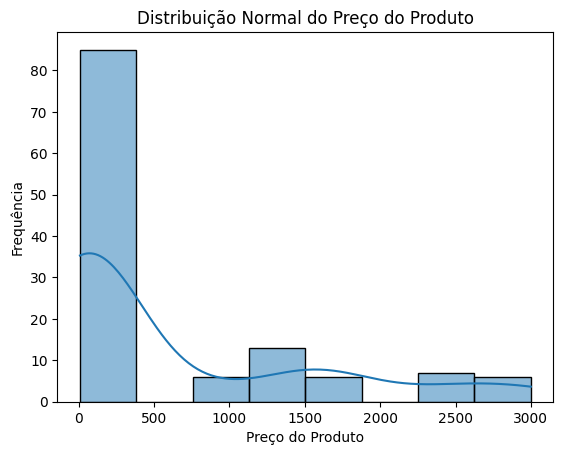

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Plotar a distribuição normal dos produtos
sns.histplot(amostra['preco_produto'], kde=True)
plt.title('Distribuição Normal do Preço do Produto')
plt.xlabel('Preço do Produto')
plt.ylabel('Frequência')
plt.show()




### Distribuição Normal da Quantidade de Vendas por Cliente

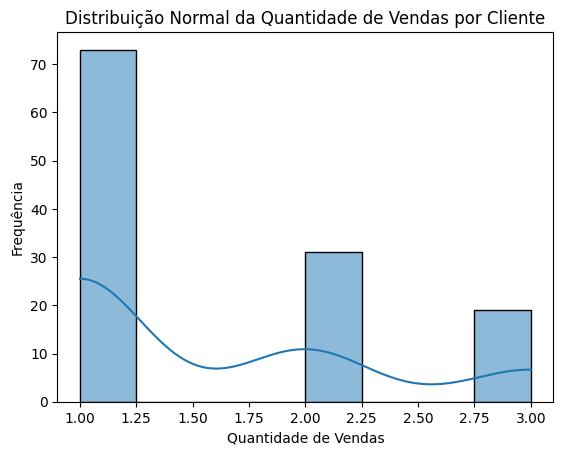

In [ ]:

# Plotar a distribuição normal das vendas para os clientes
sns.histplot(df_loja['quantidade'], kde=True)
plt.title('Distribuição Normal da Quantidade de Vendas por Cliente')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Frequência')
plt.show()


### Distribuição Normal dos Gastos dos Clientes

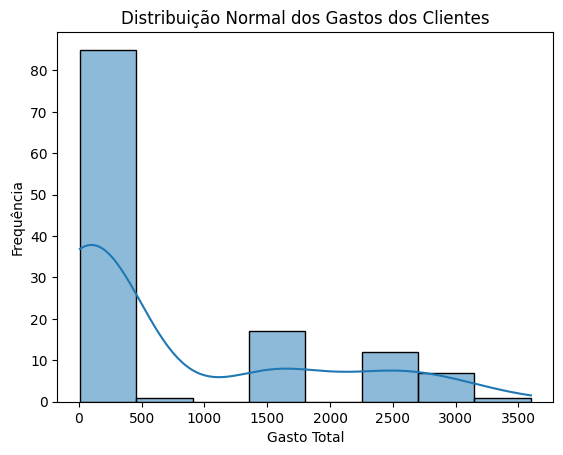

In [ ]:
# Distribuição Normal dos Gastos dos Clientes

# Calcular o gasto total por cliente
df_loja['gasto_total'] = df_loja['quantidade'] * df_loja['preco_produto']

# Plotar a distribuição normal dos gastos dos clientes
sns.histplot(df_loja['gasto_total'], kde=True)
plt.title('Distribuição Normal dos Gastos dos Clientes')
plt.xlabel('Gasto Total')
plt.ylabel('Frequência')
plt.show()


### Análise de Séries Temporais

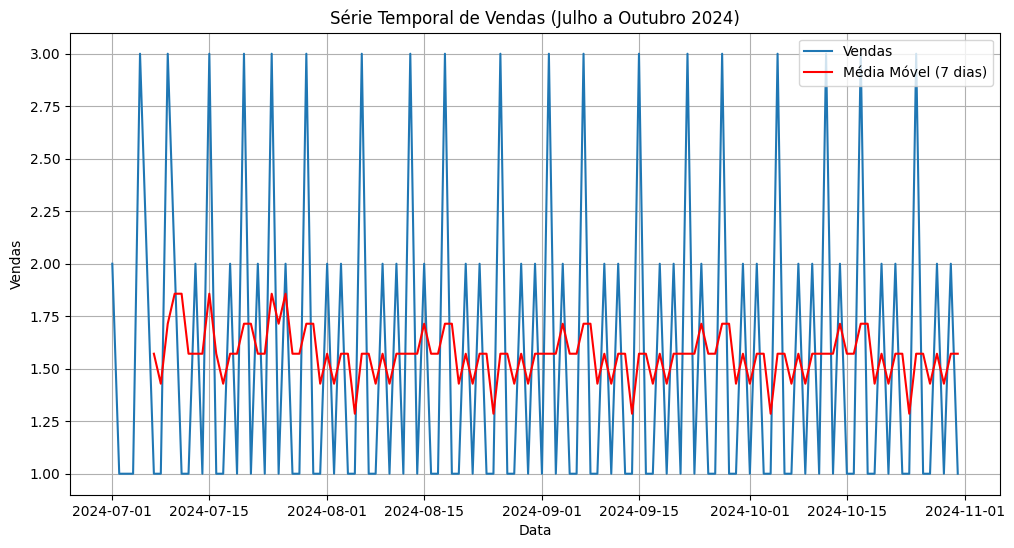

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar as vendas de julho a outubro de 2024
df_serie_temporal = df_loja
df_serie_temporal['data'] = pd.to_datetime(df_serie_temporal['data'])
df_serie_temporal = df_serie_temporal[(df_serie_temporal['data'] >= '2024-07-01') &
                                      (df_serie_temporal['data'] <= '2024-10-31')]

# Agrupar as vendas diárias e definir a coluna 'data' como índice
df_serie_temporal = df_serie_temporal.groupby('data')['quantidade'].sum().to_frame()

# Plotar a série temporal e a média móvel de 7 dias
plt.figure(figsize=(12, 6))
plt.plot(df_serie_temporal.index, df_serie_temporal['quantidade'], label='Vendas')
plt.plot(df_serie_temporal['quantidade'].rolling(window=7).mean(), label='Média Móvel (7 dias)', color='red')
plt.title('Série Temporal de Vendas (Julho a Outubro 2024)')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.grid(True)
plt.show()


### Distribuição Binomial

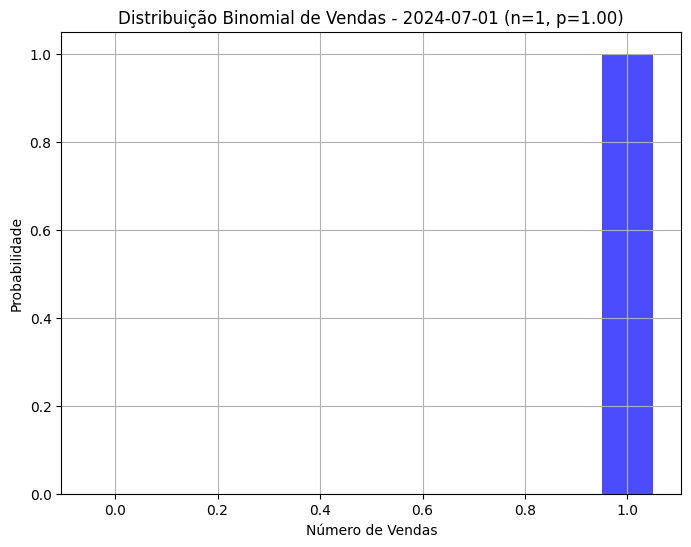

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Filtrar o DataFrame para o dia 2024-07-01
df_dia = df_loja[df_loja['data'] == '2024-07-01']

# Calcular o número total de interações e o número de vendas
total_interacoes = df_dia['id_cliente'].nunique()
total_vendas = df_dia['id_venda'].nunique()

# Calcular a probabilidade de sucesso com base nos dados
p = total_vendas / total_interacoes  # proporção de vendas

# Definir o intervalo de valores para a distribuição binomial
x = np.arange(0, total_interacoes + 1)

# Calcular a distribuição binomial com os dados
binom_pmf = binom.pmf(x, total_interacoes, p)

# Plotar a distribuição binomial
plt.figure(figsize=(8, 6))
plt.bar(x, binom_pmf, width=0.1, color='blue', alpha=0.7)
plt.xlabel('Número de Vendas')
plt.ylabel('Probabilidade')
plt.title(f'Distribuição Binomial de Vendas - 2024-07-01 (n={total_interacoes}, p={p:.2f})')
plt.grid(True)
plt.show()
